In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Read the data from the CSV file
data = pd.read_csv("./data/output.csv")

data = data[data['karma'] > 0]

# Print the first few rows of the data
print(data.head())

FileNotFoundError: [Errno 2] No such file or directory: './data/output.csv'

In [ ]:
# Add log columns for: author_median_score, karma and nb_of_stories
data["log_author_median_score"] = data["author_median_score"].apply(lambda x: 0 if x == 0 else np.log(x))
data["log_karma"] = data["karma"].apply(lambda x: 0 if x == 0 else np.log(x))
data["log_nb_of_stories"] = data["nb_of_stories"].apply(
    lambda x: 0 if x == 0 else np.log(x)
)

In [ ]:
data.head()

,author_total_score,author_median_score,karma,author_name,author_mean_score,nb_of_stories,first_appearance,last_appearance,created,log_author_median_score,log_karma,log_nb_of_stories
0,1,1,1.0,Ulied,1.0,1,2023,2023,1.675588e+09,0.000000,0.000000,0.000000
1,2,1,1.0,jt-tech781,1.0,2,2011,2011,1.313863e+09,0.000000,0.000000,0.693147
2,4,1,1.0,karole_p,2.0,2,2017,2017,1.484574e+09,0.000000,0.000000,0.693147
3,2,2,1.0,syahirahn,2.0,1,2020,2020,1.582251e+09,0.693147,0.000000,0.000000
4,12,1,2.0,liberatedleader,1.0,12,2020,2021,1.603768e+09,0.000000,0.693147,2.484907


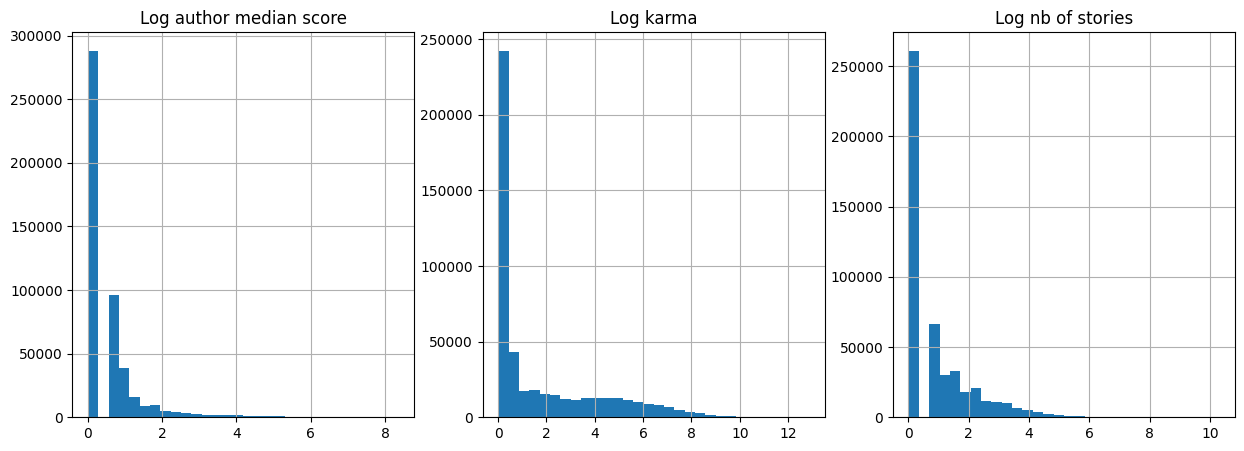

In [ ]:
# Plot the histograms of the log columns
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
data["log_author_median_score"].hist(ax=ax[0], bins=30)
ax[0].set_title("Log author median score")
data["log_karma"].hist(ax=ax[1], bins=30)
ax[1].set_title("Log karma")
data["log_nb_of_stories"].hist(ax=ax[2], bins=30)
ax[2].set_title("Log nb of stories")
plt.show()

In [ ]:
# Cut the relevant columns (pre-log ones) into bins, based on the log scale
data["log_author_median_bin"], bins = pd.cut(
    data["log_author_median_score"], bins=3, retbins=True, labels=["low", "medium", "high"]
)
print(bins)
data["log_karma_bin"], bins = pd.cut(data["log_karma"], bins=3, retbins=True, labels=["low", "medium", "high"])
print(bins)
data["log_nb_of_stories_bin"], bins = pd.cut(
    data["log_nb_of_stories"], bins=3, retbins=True, labels=["low", "medium", "high"]
)
print(bins)

[-0.00836869  2.78956439  5.57912879  8.36869318]
[-0.01286641  4.28880245  8.57760489 12.86640734]
[-0.01030314  3.43437859  6.86875718 10.30313578]


In [ ]:
_, bins = pd.cut(data["nb_of_stories"], bins=3, labels=False, retbins=True)
bins

array([-2.88250000e+01,  9.94266667e+03,  1.98843333e+04,  2.98260000e+04])

In [ ]:
print(data.head())

   author_total_score  author_median_score  karma      author_name  \
0                   1                    1    1.0            Ulied   
1                   2                    1    1.0       jt-tech781   
2                   4                    1    1.0         karole_p   
3                   2                    2    1.0        syahirahn   
4                  12                    1    2.0  liberatedleader   

   author_mean_score  nb_of_stories  first_appearance  last_appearance  \
0                1.0              1              2023             2023   
1                1.0              2              2011             2011   
2                2.0              2              2017             2017   
3                2.0              1              2020             2020   
4                1.0             12              2020             2021   

        created  log_author_median_score  log_karma  log_nb_of_stories  \
0  1.675588e+09                 0.000000   0.000000         

In [ ]:
# Make a pivot table to see the distribution of the log columns
pivot_table = data.pivot_table(
    index="log_author_median_bin",
    columns="log_karma_bin",
    values="log_nb_of_stories_bin",
    # index="log_nb_of_stories_bin",
    # columns="log_karma_bin",
    # values="log_author_median_bin",
    aggfunc="count",
)
pivot_table

/var/folders/q4/fn4z_7y152z1c5slc0pgw3fh0000gn/T/ipykernel_24303/4167321487.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = data.pivot_table(


log_karma_bin,low,medium,high
log_author_median_bin,,,
low,392268,74762,3566
medium,8357,5648,119
high,17,1129,4


In [ ]:
# Cross-tabulate the log columns
cross_tab = pd.crosstab(
    [data["log_author_median_bin"], data["log_nb_of_stories_bin"]],
    # data["log_nb_of_stories_bin"],
    data["log_karma_bin"],
    # margins=True,
    # normalize='columns',
    # normalize='all',
)
# round the values to 3 decimal points
# cross_tab = cross_tab.round(3)
# multiply the values by 100 to get percentages
# cross_tab = cross_tab * 100

cross_tab

log_karma_bin                                   low  medium  high
log_author_median_bin log_nb_of_stories_bin                      
low                   low                    386842   58852  1297
                      medium                   5414   15879  1942
                      high                       12      31   327
medium                low                      8356    5574    63
                      medium                      1      74    50
                      high                        0       0     6
high                  low                        17    1129     4

In [ ]:
for level in ["low", "medium", "high"]:
    print(data[data["log_nb_of_stories_bin"] == level][["nb_of_stories", "karma"]].describe())
    print("-" * 30)

       nb_of_stories          karma
count  462134.000000  462134.000000
mean        3.351480     114.517581
std         4.940027     805.044515
min         1.000000       1.000000
25%         1.000000       1.000000
50%         1.000000       1.000000
75%         3.000000      13.000000
max        31.000000  116036.000000
------------------------------
       nb_of_stories          karma
count   23360.000000   23360.000000
mean      102.015582    1950.933776
std       117.198050    5236.383840
min        32.000000       1.000000
25%        42.000000      97.000000
50%        60.000000     656.000000
75%       107.000000    1953.000000
max       959.000000  387088.000000
------------------------------
       nb_of_stories          karma
count     376.000000     376.000000
mean     2706.864362   27912.164894
std      2978.522629   30536.653982
min       964.000000       1.000000
25%      1218.750000   10851.750000
50%      1662.000000   17928.000000
75%      2850.250000   34447.500000
ma

In [ ]:
# Get the stats for high karma users
data[data["log_karma_bin"] == "high"].describe()['karma']

count      3689.000000
mean      13356.646246
std       15696.901052
min        5314.000000
25%        6580.000000
50%        8844.000000
75%       13989.000000
max      387088.000000
Name: karma, dtype: float64

In [ ]:
# Get the stats for medium karma users
data[data["log_karma_bin"] == "medium"].describe()["karma"]

count    81539.000000
mean       702.136045
std        929.888729
min         73.000000
25%        145.000000
50%        312.000000
75%        828.000000
max       5309.000000
Name: karma, dtype: float64

In [ ]:
# Get the stats for low karma users
data[data["log_karma_bin"] == "low"].describe()["karma"]

count    400642.000000
mean          6.157907
std          12.585797
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max          72.000000
Name: karma, dtype: float64

In [ ]:
data[data['karma'] < 0]

,author_total_score,author_median_score,karma,author_name,author_mean_score,nb_of_stories,first_appearance,last_appearance,created,log_author_median_score,log_karma,log_nb_of_stories,log_author_median_bin,log_karma_bin,log_nb_of_stories_bin


# Another view

In [ ]:
# Drop the log columns
data = data.drop(
    columns=[
        "log_author_median_score",
        "log_karma",
        "log_nb_of_stories",
        "log_author_median_bin",
        "log_karma_bin",
        "log_nb_of_stories_bin",
    ]
)
data.head()

,author_total_score,author_median_score,karma,author_name,author_mean_score,nb_of_stories,first_appearance,last_appearance,created
0,1,1,1.0,Ulied,1.0,1,2023,2023,1.675588e+09
1,2,1,1.0,jt-tech781,1.0,2,2011,2011,1.313863e+09
2,4,1,1.0,karole_p,2.0,2,2017,2017,1.484574e+09
3,2,2,1.0,syahirahn,2.0,1,2020,2020,1.582251e+09
4,12,1,2.0,liberatedleader,1.0,12,2020,2021,1.603768e+09


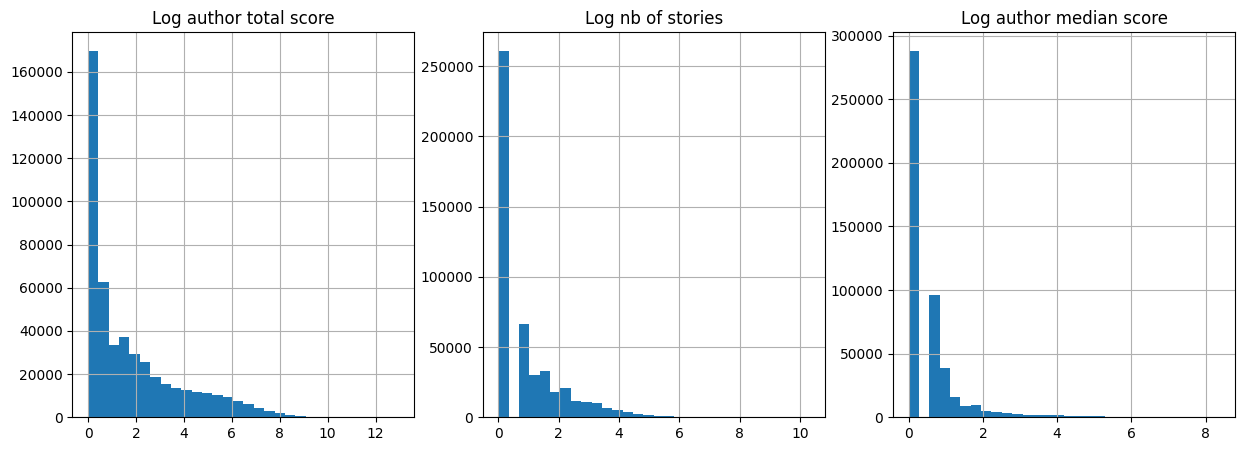

In [ ]:
data["author_total_score_log"] = data["author_total_score"].apply(lambda x: 0 if x == 0 else np.log(x))
data["nb_of_stories_log"] = data["nb_of_stories"].apply(
    lambda x: 0 if x == 0 else np.log(x)
)
data["author_median_score_log"] = data["author_median_score"].apply(
    lambda x: 0 if x == 0 else np.log(x)
)

# Plot the histograms of the log columns, with the title indicated
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
data["author_total_score_log"].hist(ax=ax[0], bins=30)
ax[0].set_title("Log author total score")
data["nb_of_stories_log"].hist(ax=ax[1], bins=30)
ax[1].set_title("Log nb of stories")
data["author_median_score_log"].hist(ax=ax[2], bins=30)
ax[2].set_title("Log author median score")
plt.show()

In [ ]:
# Cut the total score (pre-log ones) into bins, based on the log scale
# data["author_total_score_bins"], bins = pd.cut(
#     data["author_total_score"], bins=[0, 100, 10_000, 1_000_000], retbins=True, labels=["low", "medium", "high"]
# )
# data["author_total_score_bins"], bins = pd.cut(
#     data["author_total_score_log"], bins=[0, 2, 6, 12], retbins=True, labels=["low", "medium", "high"]
# )
data["author_total_score_bins"], bins = pd.cut(
    data["author_total_score_log"],
    bins=[0, 2, 4, 12],
    retbins=True,
    labels=["low", "medium", "high"],
)

print(data["author_total_score_bins"].value_counts())

# Cut the median score (pre-log ones) into bins, based on the log scale
# data["author_median_score_bins"], bins = pd.cut(
#     data["author_median_score"], bins=[0, 10, 100, 1_000], retbins=True, labels=["low", "medium", "high"]
# )
data["author_median_score_bins"], bins = pd.cut(
    data["author_median_score_log"], bins=[0, 2, 4, 10], retbins=True, labels=["low", "medium", "high"]
)
print(data["author_median_score_bins"].value_counts())

# Cut the nb of stories (pre-log ones) into bins, based on the log scale
# data["nb_of_stories_bins"], bins = pd.cut(
#     data["nb_of_stories"], bins=[0, 100, 1_000, 1_000_000], retbins=True, labels=["low", "medium", "high"]
# )
data["nb_of_stories_bins"], bins = pd.cut(
    data["nb_of_stories_log"], bins=[0, 2, 4, 12], retbins=True, labels=["low", "medium", "high"]
)
print(data["nb_of_stories_bins"].value_counts())

author_total_score_bins
low       155040
medium    135150
high       25823
Name: count, dtype: int64
author_median_score_bins
low       169322
medium     21558
high        6812
Name: count, dtype: int64
nb_of_stories_bins
low       148010
medium     63218
high       13533
Name: count, dtype: int64


In [ ]:
# cross-tabulate the columns
cross_tab = pd.crosstab(
    [data["nb_of_stories_bins"], data["author_median_score_bins"]],
    data["author_total_score_bins"],
    # margins=True,
    normalize="columns",
)
cross_tab = cross_tab.round(3) * 100
cross_tab

author_total_score_bins                        low  medium  high
nb_of_stories_bins author_median_score_bins                     
low                low                       100.0    55.6   5.1
                   medium                      0.0     6.7   2.0
                   high                        0.0     0.6   1.8
medium             low                         0.0    35.8  47.7
                   medium                      0.0     0.6   3.7
                   high                        0.0     0.0   0.4
high               low                         0.0     0.7  38.7
                   medium                      0.0     0.0   0.5
                   high                        0.0     0.0   0.0

In [ ]:
# Change the names inside the cross-tab
cross_tab.index = cross_tab.index.set_names(["Nb of stories (Consistency)", "Median score (Impact)"])
cross_tab.columns = cross_tab.columns.set_names(["Total upvotes (Score)"])
cross_tab

Total upvotes (Score)                                low  medium  high
Nb of stories (Consistency) Median score (Impact)                     
low                         low                    100.0    55.6   5.1
                            medium                   0.0     6.7   2.0
                            high                     0.0     0.6   1.8
medium                      low                      0.0    35.8  47.7
                            medium                   0.0     0.6   3.7
                            high                     0.0     0.0   0.4
high                        low                      0.0     0.7  38.7
                            medium                   0.0     0.0   0.5
                            high                     0.0     0.0   0.0